# LSTM for international airline passengers problem with regression framing

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/amasetti/AI-Portfolio-Examples/blob/master/4.%20LSTM/main.ipynb)

This code implements a Long Short-Term Memory (LSTM) neural network model for time series forecasting. It uses historical airline passenger data to train the model and make predictions. The code preprocesses the dataset by normalizing it and splitting it into train and test sets. It then creates the LSTM model architecture, compiles it, and fits it to the training data. After training, the model is used to make predictions on both the training and test sets. The predictions are then inverted back to the original scale using the scaler. Finally, the code calculates the root mean squared error (RMSE) for the train and test predictions and plots the baseline data, along with the train and test predictions, to visualize the model's performance.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
tf.random.set_seed(7)

# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Define the LSTM Model

In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))


## Fit the model

In [12]:
from sklearn.metrics import accuracy_score, classification_report

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Epoch 1/100
94/94 - 1s - loss: 0.0558 - 781ms/epoch - 8ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0314 - 56ms/epoch - 591us/step
Epoch 3/100
94/94 - 0s - loss: 0.0229 - 58ms/epoch - 620us/step
Epoch 4/100
94/94 - 0s - loss: 0.0206 - 53ms/epoch - 566us/step
Epoch 5/100
94/94 - 0s - loss: 0.0197 - 53ms/epoch - 565us/step
Epoch 6/100
94/94 - 0s - loss: 0.0189 - 52ms/epoch - 557us/step
Epoch 7/100
94/94 - 0s - loss: 0.0183 - 55ms/epoch - 584us/step
Epoch 8/100
94/94 - 0s - loss: 0.0176 - 54ms/epoch - 573us/step
Epoch 9/100
94/94 - 0s - loss: 0.0172 - 53ms/epoch - 568us/step
Epoch 10/100
94/94 - 0s - loss: 0.0164 - 53ms/epoch - 559us/step
Epoch 11/100
94/94 - 0s - loss: 0.0158 - 81ms/epoch - 862us/step
Epoch 12/100
94/94 - 0s - loss: 0.0150 - 52ms/epoch - 551us/step
Epoch 13/100
94/94 - 0s - loss: 0.0143 - 51ms/epoch - 547us/step
Epoch 14/100
94/94 - 0s - loss: 0.0136 - 52ms/epoch - 556us/step
Epoch 15/100
94/94 - 0s - loss: 0.0127 - 52ms/epoch - 552us/step
Epoch 16/100
94/94 - 0s - loss: 0.0

## Plot the predictions

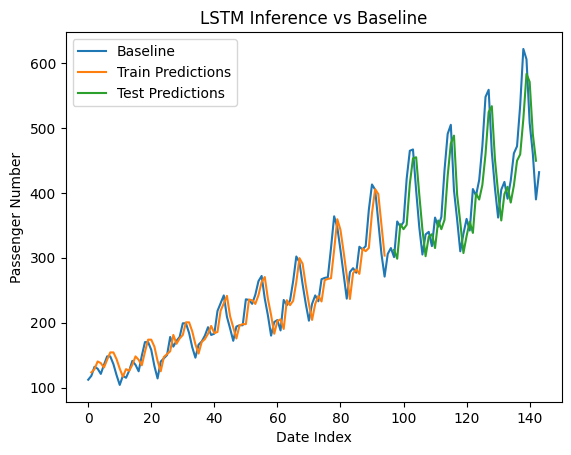

In [19]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='Baseline')
plt.plot(trainPredictPlot, label='Train Predictions')
plt.plot(testPredictPlot, label='Test Predictions')
plt.xlabel('Date Index')
plt.ylabel('Passenger Number')
plt.title('LSTM Inference vs Baseline')
plt.legend()
plt.show()